In [3]:
# how to find best k using silhouette 
# silhouette score

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.


DBSCAN is not just able to cluster the data points correctly, but it also perfectly detects noise in the dataset.

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.


DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN Clustering Algorithm

We start with the data points and values of epsilon and minPts as input –

- We select a random starting point that has not been visited.

- Determine the neighborhood of this point using epsilon which essentially acts as a radius.

- If the points in the neighborhood satisfy minPts criteria then the point is marked as a core point. The clustering process will start and the point is marked as visited else this point is labeled as noise.

- All points within the neighborhood of the core point are also marked as part of the cluster and the above procedure from step 2 is repeated for all epsilon neighborhood points.

- A new unvisited point is fetched, and following the above steps they are either included to form another cluster or they are marked as noise.

- The above process is continued till all points are visited.
    
    
    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [7]:
df = df.drop(['sepal length (cm)','sepal width (cm)'], axis=1)
df.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

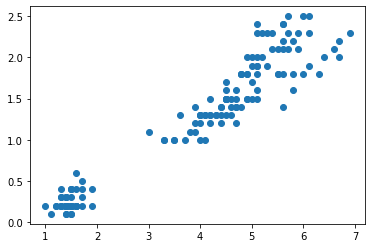

In [8]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.show()

 we need to find the value of epsilon and minPoints and then train our model again.
 
For epsilon, using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset.
We obtain this using NearestNeighbors from sklearn.neighbors.

In [9]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

In [10]:
type(distances)

numpy.ndarray

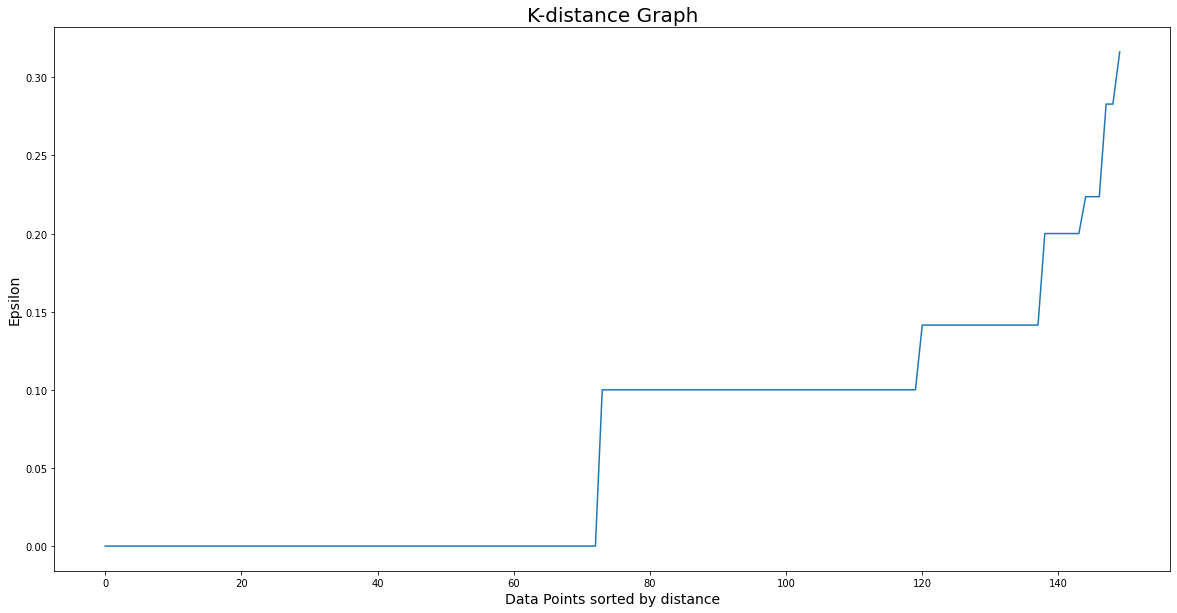

In [11]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [12]:
df.shape

(150, 2)

In [13]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.25,min_samples=6)
dbscan.fit(df)

DBSCAN(eps=0.25, min_samples=6)

In [14]:
df['DBSCAN_opt_labels']=dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

 1    81
 0    50
-1    19
Name: DBSCAN_opt_labels, dtype: int64

In [15]:
cluster0 = df[df['DBSCAN_opt_labels']==0]
cluster0.head()

petal length (cm)  petal width (cm)  DBSCAN_opt_labels
0                1.4               0.2                  0
1                1.4               0.2                  0
2                1.3               0.2                  0
3                1.5               0.2                  0
4                1.4               0.2                  0

In [16]:
cluster1 = df[df['DBSCAN_opt_labels'] == 1]
cluster1.head()

petal length (cm)  petal width (cm)  DBSCAN_opt_labels
50                4.7               1.4                  1
51                4.5               1.5                  1
52                4.9               1.5                  1
53                4.0               1.3                  1
54                4.6               1.5                  1

In [17]:
cluster2 = df[df['DBSCAN_opt_labels'] == -1]
cluster2.head()

petal length (cm)  petal width (cm)  DBSCAN_opt_labels
57                3.3               1.0                 -1
60                3.5               1.0                 -1
64                3.6               1.3                 -1
79                3.5               1.0                 -1
93                3.3               1.0                 -1

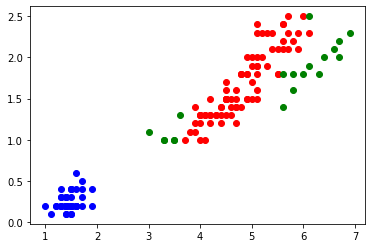

In [18]:
# centroids = pd.DataFrame(data=kmean.cluster_centers_, columns=['x', 'y'])
# centroids

plt.scatter(cluster0['petal length (cm)'], cluster0['petal width (cm)'], color='blue')
plt.scatter(cluster1['petal length (cm)'], cluster1['petal width (cm)'], color='red')
plt.scatter(cluster2['petal length (cm)'], cluster2['petal width (cm)'], color='green')

plt.show()